## STEP1: **Importing Libraries**

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
#import lux
#XGboost
#impute.KnnImpute

## Google drive
If you want to get or save files from/to your google drive 
>Here is the snippet code to do this ( after you run the below cell you should give the permission to google colab )

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Problem statement: There are too many reservations got canceled, so we are going to predict hotel cancellations.

## STEP2: **Load Data**

In [38]:
hotel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv')

## STEP3: **Exploration Phase**

In [39]:
pd.set_option("display.max_columns", None) #To show all columns
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [40]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [41]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [42]:
hotel.duplicated().sum()

31994

## STEP4: **Cleaning Phase**


---



In [43]:
hotel['children'] = hotel['children'].fillna(hotel['children'].mean()) #Filling not a number values with the mean
hotel['children'] = hotel['children'].astype("int")
hotel['agent'] = hotel['agent'].fillna(hotel['agent'].median()) #We used median because the data is left skewed
hotel['agent'] = hotel['agent'].astype("int")
hotel['company'] = hotel['company'].fillna(0)
hotel['company'] = hotel['company'].astype('category')
hotel['company'] = hotel['company'].dropna()
hotel['country'] = hotel['country'].fillna('Non')
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])
hotel = hotel.drop_duplicates()

## Feature engineering

In [44]:
hotel.reservation_status_date.value_counts() 
hotel['reservation_status_date_day'] = hotel['reservation_status_date'].dt.day
hotel['reservation_status_date_month'] = hotel['reservation_status_date'].dt.month
hotel['reservation_status_date_year'] = hotel['reservation_status_date'].dt.year

<ipython-input-44-6480884c986d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel['reservation_status_date_day'] = hotel['reservation_status_date'].dt.day
<ipython-input-44-6480884c986d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel['reservation_status_date_month'] = hotel['reservation_status_date'].dt.month


In [45]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date_day,reservation_status_date_month,reservation_status_date_year
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,82.957858,0.749565,106.337246,0.084226,0.698567,15.765069,6.268067,2016.186954
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,108.605400,10.015731,55.013953,0.281533,0.831946,8.792161,3.231637,0.680327
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,1.000000,2014.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000,8.000000,4.000000,2016.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,98.100000,0.000000,0.000000,16.000000,6.000000,2016.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000,23.000000,9.000000,2017.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,31.000000,12.000000,2017.000000


In [46]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  b

In [47]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [48]:
hotel.duplicated().sum()

0

#EDA

In [49]:
sns.set_style(style='darkgrid')
sns.set(rc={'figure.figsize':(8,6)})

In [50]:
canceled_res = hotel[hotel['is_canceled'] == 1]
canceled_res

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_day,reservation_status_date_month,reservation_status_date_year
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0.0,0,Transient,82.0,0,1,Canceled,2015-05-06,6,5,2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,0.0,0,Transient,105.5,0,0,Canceled,2015-04-22,22,4,2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,0.0,0,Transient,123.0,0,0,Canceled,2015-06-23,23,6,2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,0.0,0,Transient,107.0,0,2,Canceled,2015-05-11,11,5,2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,14,0.0,0,Transient,108.3,0,2,Canceled,2015-05-29,29,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,9,0.0,0,Transient,0.0,0,3,Canceled,2017-04-25,25,4,2017
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,14,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05,5,6,2017
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,14,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31,31,5,2017
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,14,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17,17,7,2017


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Canceled Reservations')

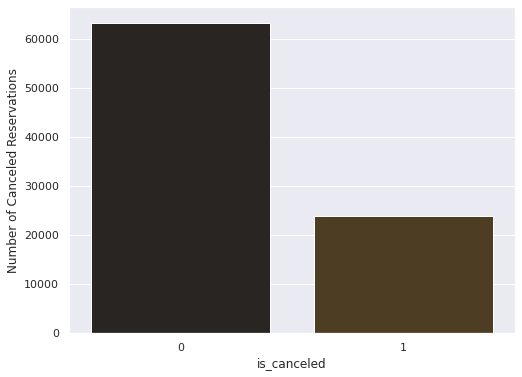

In [51]:
ax = sns.countplot(hotel['is_canceled'], palette=sns.dark_palette('orange'));
ax.set_ylabel('Number of Canceled Reservations')

In [52]:
special_req_for_room_type = hotel.groupby('is_repeated_guest')['total_of_special_requests'].sum() 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


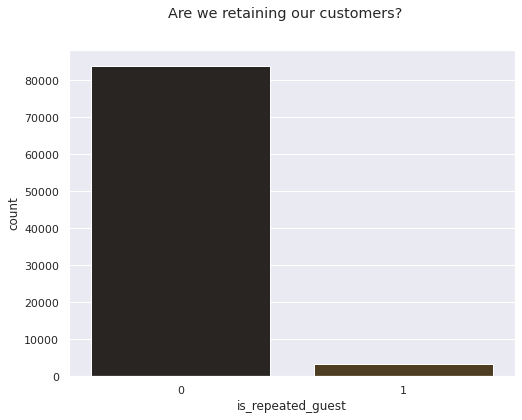

In [53]:
ax = sns.countplot(hotel['is_repeated_guest'], palette=sns.dark_palette('orange'));
ax.figure.suptitle('Are we retaining our customers?');

In [54]:
arr_year_guest_type = hotel.groupby('arrival_date_year')['is_repeated_guest'].sum() #use pivot_table here
arr_year_guest_type = pd.DataFrame(arr_year_guest_type).reset_index()
arr_year_guest_type

,arrival_date_year,is_repeated_guest
0,2015,367
1,2016,1680
2,2017,1368


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Repeated customer over 3 years')

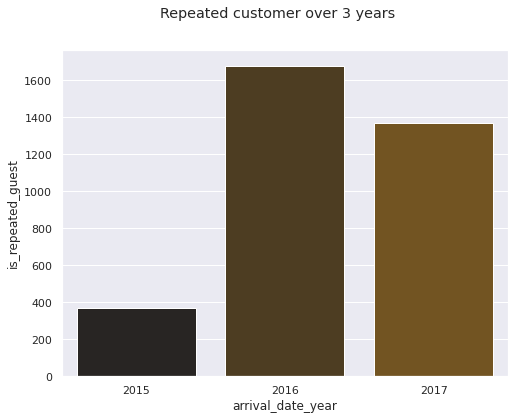

In [55]:
ax = sns.barplot(arr_year_guest_type['arrival_date_year'], arr_year_guest_type['is_repeated_guest'], palette=sns.dark_palette('orange'));
ax.figure.suptitle('Repeated customer over 3 years')

(array([13313.,     0.,     0.,     0.,     0., 42391.,     0.,     0.,
            0., 31692.]),
 array([2015. , 2015.2, 2015.4, 2015.6, 2015.8, 2016. , 2016.2, 2016.4,
        2016.6, 2016.8, 2017. ]),
 <a list of 10 Patch objects>)

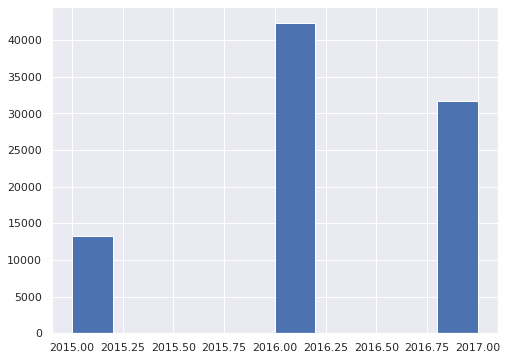

In [56]:
plt.hist(hotel['arrival_date_year'])

In [57]:
groupby_by_country = hotel.groupby('country').sum()
groupby_by_country.sort_values(by='is_canceled', ascending=False, inplace=True)


In [58]:
top_10_countries = groupby_by_country[:10].reset_index() # top 10 countries that cancel
top_10_countries.is_canceled

0    9791
1    1985
2    1862
3    1733
4    1075
5    1053
6     727
7     668
8     459
9     411
Name: is_canceled, dtype: int64

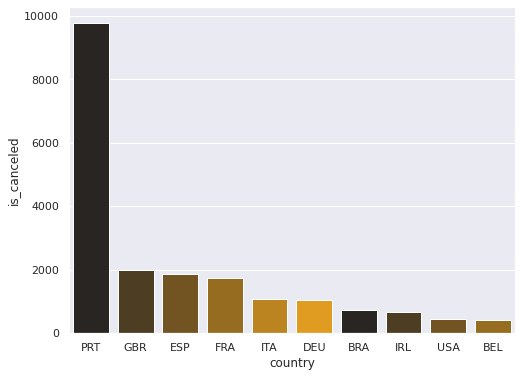

In [59]:
sns.barplot(data=top_10_countries, x='country', y='is_canceled',  palette=sns.dark_palette('orange'))

##Preprocessing
Here we are going to change the object values to categorical (only numeric)

In [60]:
# new_df = pd.get_dummies('hotel', 'arrival_date_year', 'meal', 'country',
#                         'market_segment', 'distribution_channel', 'reserved_room_type', hotel)


In [61]:
Features = hotel.loc[:, hotel.columns != 'is_canceled']
Target = hotel.iloc[:, 1]

In [62]:
new_list = [] #to store the new values
label_encoder=LabelEncoder()
for i in Features:
  label_ids = label_encoder.fit_transform(hotel[i])
  new_list.append(label_ids)

In [63]:
new_data = np.array(new_list)

y = np.array(Target)
X = np.array(new_data).transpose()

In [64]:
X.shape, y.shape

((87396, 34), (87396,))

In [65]:
# X = X.reshape(-1, 1)
X.shape

(87396, 34)

##Model Building

###Splitting the data into train and test set

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
SEED = 1

###LogisticRegression, KNeighborsClassifier, and DecisionTreeClassifier

In [67]:
# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 0.743
K Nearest Neighbours : 0.796
Classification Tree : 0.988


###GridSearchCV

In [68]:
from sklearn.metrics import roc_auc_score

# Define params_dt
params_dt = {'max_depth':[2,3,4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fitting grid_dt to the traning set
grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.988


###BaggingClassifier

In [69]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict y_pred
y_pred = bc.predict(X_test)

# Evaluate accuracy
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 1.00




---

